In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from string import punctuation
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [2]:
data = pd.read_table('ck_data.txt', names = ['label', 'reviews'])
data

,label,reviews
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
...,...,...
99995,0,한글화해주면 10개산다
99996,0,개쌉노잼 ㅋㅋ
99997,0,노잼이네요... 30분하고 지웠어요...
99998,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


In [3]:
data.isnull().sum()

label      0
reviews    0
dtype: int64

In [4]:
data.nunique()

label          2
reviews    99892
dtype: int64

In [6]:
data = data.drop_duplicates(subset = ['reviews'])
data

,label,reviews
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
...,...,...
99995,0,한글화해주면 10개산다
99996,0,개쌉노잼 ㅋㅋ
99997,0,노잼이네요... 30분하고 지웠어요...
99998,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


In [7]:
data['label'].astype(int)

0        0
1        0
2        1
3        1
4        1
        ..
99995    0
99996    0
99997    0
99998    1
99999    1
Name: label, Length: 99892, dtype: int32

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

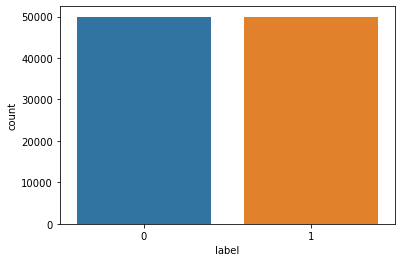

In [9]:
sns.countplot(data['label'])

In [11]:
t_l_1 = data[data['label'] == 1]['reviews'].str.len()
t_l_0 = data[data['label'] == 0]['reviews'].str.len()

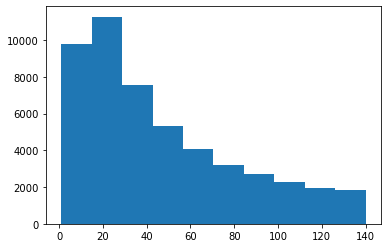

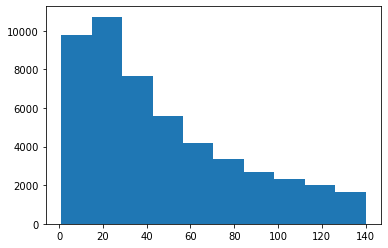

In [14]:
plt.hist(t_l_1)
plt.show()

plt.hist(t_l_0)
plt.show()

In [18]:
st = set(['은', '는', '이', '가', '을', '를', '도', '에게', '로', '에', '요', '의', '우리', '저희', '나', '님'])
p = list(punctuation)
st.update(p)

In [19]:
data['reviews'] = data['reviews'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', '')
data['reviews'] = data['reviews'].str.replace('^ +', '')
data['reviews'] = data['reviews'].replace('', np.nan)
data = data.dropna(how = 'any', axis = 0)
data

C:\Users\김철용\AppData\Local\Temp/ipykernel_12128/2888147693.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['reviews'] = data['reviews'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', '')
C:\Users\김철용\AppData\Local\Temp/ipykernel_12128/2888147693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews'] = data['reviews'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', '')
C:\Users\김철용\AppData\Local\Temp/ipykernel_12128/2888147693.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['reviews'] = data['reviews'].str.replace('^ +', '')
C:\Users\김철용\AppData\Local\Temp/ipykernel_12128/2888147693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,label,reviews
0,0,노래가 너무 적음
1,0,돌겠네 진짜 황숙아 어크 공장 그만 돌려라 죽는다
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악차악차악 정말 이래서 왕국을 되찾을 수 있는거야
4,1,시간 때우기에 좋음 도전과제는 시간이면 다 깰 수 있어요
...,...,...
99995,0,한글화해주면 개산다
99996,0,개쌉노잼 ㅋㅋ
99997,0,노잼이네요 분하고 지웠어요
99998,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기 영어는 그리 어렵지 않습니다


In [20]:
okt = Okt()
okt_l = []
for sentence in data['reviews']:
    okt_l.append(okt.morphs(sentence))
okt_l

[['노래', '가', '너무', '적음'],
 ['돌겠네', '진짜', '황숙', '아', '어크', '공장', '그만', '돌려라', '죽는다'],
 ['막노동',
  '체험판',
  '막노동',
  '하는',
  '사람',
  '인데',
  '장비',
  '를',
  '내',
  '가',
  '사야',
  '돼',
  '뭐',
  '지'],
 ['차악차악차악', '정말', '이래서', '왕국', '을', '되찾을', '수', '있는거야'],
 ['시간', '때우기에', '좋음', '도전', '과제', '는', '시간', '이면', '다', '깰', '수', '있어요'],
 ['역시', '재미있네요', '전작', '에서', '할수', '없었던', '자유로운', '덱', '빌딩', '도', '좋네요'],
 ['재미있었습니다'],
 ['은근', '쉽지만', '은근', '어려운', '게임'],
 ['베',
  'ㅈ',
  '스',
  '다',
  '이',
  '개',
  'ㅐ',
  '끼',
  '들',
  '아',
  '시작',
  '할',
  '때',
  '체스판',
  '돌아가는거',
  '분동',
  '안',
  '번',
  '봤',
  '더',
  '나',
  'ㅈㄴ',
  '빡치네',
  '진짜',
  '무한',
  '로딩',
  '버그',
  '안',
  '쳐',
  '고치냐',
  '겜',
  '하지말라는',
  '거',
  '냐'],
 ['시간', '분동', '안', '스트레스', '다', '풀림', 'ㄹㅇ'],
 ['걍', '겜임', '계정', '을', '못', '만들어', '미친', '겜'],
 ['관람객', '호랑이', '불가'],
 ['재미', '쩡', '초반', '에', '좀', '힘들어여', '도트', '라서', '조아'],
 ['포켓볼',
  '도',
  '몰랐는데',
  '이',
  '걸',
  '로',
  '배워',
  '갑니다',
  '심심할',
  '때',
  '하면',
  '좋아요',
  '컴퓨터',
  '상대',
  '하는

In [34]:
s_otk_l = []
for sentence in okt_l:
    s_otk_l.append([word for word in sentence if word not in st])
s_otk_l

[['노래', '너무', '적음'],
 ['돌겠네', '진짜', '황숙', '아', '어크', '공장', '그만', '돌려라', '죽는다'],
 ['막노동', '체험판', '막노동', '하는', '사람', '인데', '장비', '내', '사야', '돼', '뭐', '지'],
 ['차악차악차악', '정말', '이래서', '왕국', '되찾을', '수', '있는거야'],
 ['시간', '때우기에', '좋음', '도전', '과제', '시간', '이면', '다', '깰', '수', '있어요'],
 ['역시', '재미있네요', '전작', '에서', '할수', '없었던', '자유로운', '덱', '빌딩', '좋네요'],
 ['재미있었습니다'],
 ['은근', '쉽지만', '은근', '어려운', '게임'],
 ['베',
  'ㅈ',
  '스',
  '다',
  '개',
  'ㅐ',
  '끼',
  '들',
  '아',
  '시작',
  '할',
  '때',
  '체스판',
  '돌아가는거',
  '분동',
  '안',
  '번',
  '봤',
  '더',
  'ㅈㄴ',
  '빡치네',
  '진짜',
  '무한',
  '로딩',
  '버그',
  '안',
  '쳐',
  '고치냐',
  '겜',
  '하지말라는',
  '거',
  '냐'],
 ['시간', '분동', '안', '스트레스', '다', '풀림', 'ㄹㅇ'],
 ['걍', '겜임', '계정', '못', '만들어', '미친', '겜'],
 ['관람객', '호랑이', '불가'],
 ['재미', '쩡', '초반', '좀', '힘들어여', '도트', '라서', '조아'],
 ['포켓볼',
  '몰랐는데',
  '걸',
  '배워',
  '갑니다',
  '심심할',
  '때',
  '하면',
  '좋아요',
  '컴퓨터',
  '상대',
  '하는거',
  '제대로',
  '이겨',
  '보고',
  '싶은데',
  '잘',
  '안되네요'],
 ['트레이아크', '사랑', '해요', '핰핰'],
 ['좆망', '겜', '하

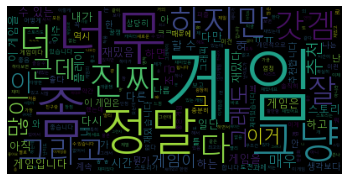

In [37]:
wc = WordCloud(font_path = 'C:\Windows\Fonts\malgunsl.ttf', max_words = 2000).generate(' '.join(data[data['label'] == 1]['reviews']))
plt.imshow(wc)
plt.axis('off')
plt.show()

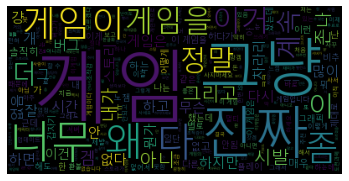

In [38]:
wc = WordCloud(font_path = 'C:\Windows\Fonts\malgunsl.ttf', max_words = 2000).generate(' '.join(data[data['label'] == 0]['reviews']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [40]:
a_st_l = ['게임', '너무', '그냥', '좀', '더', '정말', '다', '이']
st.update(a_st_l)

In [41]:
s_otk_l2 = []
for sentence in okt_l:
    s_otk_l2.append([word for word in sentence if word not in st])
s_otk_l2

[['노래', '적음'],
 ['돌겠네', '진짜', '황숙', '아', '어크', '공장', '그만', '돌려라', '죽는다'],
 ['막노동', '체험판', '막노동', '하는', '사람', '인데', '장비', '내', '사야', '돼', '뭐', '지'],
 ['차악차악차악', '이래서', '왕국', '되찾을', '수', '있는거야'],
 ['시간', '때우기에', '좋음', '도전', '과제', '시간', '이면', '깰', '수', '있어요'],
 ['역시', '재미있네요', '전작', '에서', '할수', '없었던', '자유로운', '덱', '빌딩', '좋네요'],
 ['재미있었습니다'],
 ['은근', '쉽지만', '은근', '어려운'],
 ['베',
  'ㅈ',
  '스',
  '개',
  'ㅐ',
  '끼',
  '들',
  '아',
  '시작',
  '할',
  '때',
  '체스판',
  '돌아가는거',
  '분동',
  '안',
  '번',
  '봤',
  'ㅈㄴ',
  '빡치네',
  '진짜',
  '무한',
  '로딩',
  '버그',
  '안',
  '쳐',
  '고치냐',
  '겜',
  '하지말라는',
  '거',
  '냐'],
 ['시간', '분동', '안', '스트레스', '풀림', 'ㄹㅇ'],
 ['걍', '겜임', '계정', '못', '만들어', '미친', '겜'],
 ['관람객', '호랑이', '불가'],
 ['재미', '쩡', '초반', '힘들어여', '도트', '라서', '조아'],
 ['포켓볼',
  '몰랐는데',
  '걸',
  '배워',
  '갑니다',
  '심심할',
  '때',
  '하면',
  '좋아요',
  '컴퓨터',
  '상대',
  '하는거',
  '제대로',
  '이겨',
  '보고',
  '싶은데',
  '잘',
  '안되네요'],
 ['트레이아크', '사랑', '해요', '핰핰'],
 ['좆망', '겜', '하지마', '무슨', '처음', '키', '자마자', '매칭', '왜', '렙', '하

In [82]:
X = s_otk_l2
Y = np.array(data['label'])

In [83]:
x_data, tt_x, y_data, tt_y = train_test_split(X, Y, test_size = 0.3, random_state = 22)
t_x, v_x, t_y, v_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 22)

In [84]:
tk = Tokenizer()
tk.fit_on_texts(t_x)

In [85]:
len(tk.word_index)

59249

In [86]:
tk.word_counts

OrderedDict([('잼나요', 4),
             ('중간', 370),
             ('못', 3370),
             ('풀어서', 6),
             ('답지', 13),
             ('본', 405),
             ('거도', 13),
             ('잇지만', 10),
             ('좋아요', 187),
             ('ㅎㅎ', 420),
             ('진짜', 2068),
             ('꿀잼', 359),
             ('이에요', 145),
             ('제작자', 192),
             ('이런', 1000),
             ('만들어주셔서', 7),
             ('감사합니다', 94),
             ('제가월레', 1),
             ('원피스', 23),
             ('만화', 31),
             ('많이', 1142),
             ('보는대', 3),
             ('그걸', 89),
             ('으로', 4821),
             ('내주시다', 1),
             ('닛', 9),
             ('지금', 867),
             ('알아서', 48),
             ('계속', 1013),
             ('플레이', 3454),
             ('하고', 3360),
             ('잇어요', 11),
             ('감샤감샤', 1),
             ('갓', 2056),
             ('겜', 4538),
             ('사고나서', 15),
             ('후회', 322),
             ('하지마', 179),
      

In [87]:
word_num = len([w for w in sorted(list(tk.word_counts.items()), key = lambda x: x[1]) if w[1] > 4]) + 1
word_num

12562

In [88]:
tk = Tokenizer(num_words = word_num)
tk.fit_on_texts(t_x)

In [89]:
t_t_x = tk.texts_to_sequences(t_x)
t_v_x = tk.texts_to_sequences(v_x)
t_tt_x = tk.texts_to_sequences(tt_x)

In [90]:
drop_t = [idx for idx, sentence in enumerate(t_t_x) if len(sentence) < 1]
drop_v = [idx for idx, sentence in enumerate(t_v_x) if len(sentence) < 1]
drop_tt = [idx for idx, sentence in enumerate(t_tt_x) if len(sentence) < 1]

In [91]:
t_t_x = np.delete(t_t_x, drop_t, axis = 0)
t_y = np.delete(t_y, drop_t, axis = 0)
t_v_x = np.delete(t_v_x, drop_v, axis = 0)
v_y = np.delete(v_y, drop_v, axis = 0)
t_tt_x = np.delete(t_tt_x, drop_tt, axis = 0)
tt_y = np.delete(tt_y, drop_tt, axis = 0)

In [93]:
p_l = max([len(pad_sequences(t_t_x)[0]), len(pad_sequences(t_v_x)[0]), len(pad_sequences(t_tt_x)[0])])
p_l

52

In [94]:
t_x = pad_sequences(t_t_x, maxlen = p_l)
v_x = pad_sequences(t_v_x, maxlen = p_l)
tt_x = pad_sequences(t_tt_x, maxlen = p_l)

In [95]:
t_x.shape, v_x.shape, tt_x.shape, t_y.shape, v_y.shape, tt_y.shape

((55505, 52), (13859, 52), (29697, 52), (55505,), (13859,), (29697,))

In [96]:
batch_size = 256
max_sentence_num = 52
embedding_len = 64
neuron_num = 64
d_out = 0.7
lr = 0.001
ec = 50

In [99]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, restore_best_weights = True)
ck1 = ModelCheckpoint('best_m1.h5', monitor = 'val_accuracy', mode = 'max', save_best_only = True)
ck2 = ModelCheckpoint('best_m2.h5', monitor = 'val_accuracy', mode = 'max', save_best_only = True)
ck3 = ModelCheckpoint('best_m3.h5', monitor = 'val_accuracy', mode = 'max', save_best_only = True)

In [100]:
m1 = Sequential()
m1.add(Embedding(word_num, embedding_len, input_length = max_sentence_num))
m1.add(LSTM(neuron_num, dropout = d_out, return_sequences = True))
m1.add(LSTM(neuron_num // 2, dropout = d_out))
m1.add(Dense(neuron_num, activation = 'relu'))
m1.add(Dropout(d_out))
m1.add(BatchNormalization())
m1.add(Dense(neuron_num // 2 , activation = 'relu'))
m1.add(Dropout(d_out))
m1.add(BatchNormalization())
m1.add(Dense(1, activation = 'sigmoid'))
m1.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [101]:
hy1 = m1.fit(t_x, t_y, epochs = ec, batch_size = batch_size, validation_data = (v_x, v_y), callbacks = [es, ck1])

Epoch 1/50
217/217 [==============================] - 53s 226ms/step - loss: 0.7048 - accuracy: 0.5956 - val_loss: 0.6571 - val_accuracy: 0.5654
Epoch 2/50
217/217 [==============================] - 46s 213ms/step - loss: 0.4940 - accuracy: 0.7719 - val_loss: 0.5398 - val_accuracy: 0.7413
Epoch 3/50
217/217 [==============================] - 47s 215ms/step - loss: 0.4409 - accuracy: 0.8076 - val_loss: 0.4809 - val_accuracy: 0.7704
Epoch 4/50
217/217 [==============================] - 44s 205ms/step - loss: 0.4085 - accuracy: 0.8237 - val_loss: 0.4915 - val_accuracy: 0.7698
Epoch 5/50
217/217 [==============================] - 48s 221ms/step - loss: 0.3779 - accuracy: 0.8404 - val_loss: 0.5053 - val_accuracy: 0.7702
Epoch 6/50
217/217 [==============================] - 46s 214ms/step - loss: 0.3575 - accuracy: 0.8510 - val_loss: 0.5477 - val_accuracy: 0.7562


In [102]:
m2 = Sequential()
m2.add(Embedding(word_num, embedding_len, input_length = max_sentence_num))
m2.add(GRU(neuron_num, dropout = d_out, return_sequences = True))
m2.add(GRU(neuron_num // 2, dropout = d_out))
m2.add(Dense(neuron_num, activation = 'relu'))
m2.add(Dropout(d_out))
m2.add(BatchNormalization())
m2.add(Dense(neuron_num // 2 , activation = 'relu'))
m2.add(Dropout(d_out))
m2.add(BatchNormalization())
m2.add(Dense(1, activation = 'sigmoid'))
m2.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [103]:
hy2 = m2.fit(t_x, t_y, epochs = ec, batch_size = batch_size, validation_data = (v_x, v_y), callbacks = [es, ck2])

Epoch 1/50
217/217 [==============================] - 53s 212ms/step - loss: 0.6933 - accuracy: 0.6006 - val_loss: 0.6202 - val_accuracy: 0.6675
Epoch 2/50
217/217 [==============================] - 45s 208ms/step - loss: 0.5034 - accuracy: 0.7638 - val_loss: 0.4949 - val_accuracy: 0.7620
Epoch 3/50
217/217 [==============================] - 43s 197ms/step - loss: 0.4429 - accuracy: 0.8051 - val_loss: 0.4882 - val_accuracy: 0.7731
Epoch 4/50
217/217 [==============================] - 40s 184ms/step - loss: 0.4110 - accuracy: 0.8237 - val_loss: 0.5100 - val_accuracy: 0.7647
Epoch 5/50
217/217 [==============================] - 40s 187ms/step - loss: 0.3847 - accuracy: 0.8358 - val_loss: 0.4981 - val_accuracy: 0.7696
Epoch 6/50
217/217 [==============================] - 46s 211ms/step - loss: 0.3619 - accuracy: 0.8487 - val_loss: 0.5177 - val_accuracy: 0.7677


In [134]:
m3 = Sequential()
m3.add(Embedding(word_num, embedding_len, input_length = max_sentence_num))
m3.add(Bidirectional(LSTM(neuron_num, dropout = d_out, return_sequences = True)))
m3.add(Bidirectional(LSTM(neuron_num // 2, dropout = d_out)))
m3.add(Dense(neuron_num, activation = 'relu'))
m3.add(Dropout(d_out))
m3.add(BatchNormalization())
m3.add(Dense(neuron_num * 2 , activation = 'relu'))
m3.add(Dropout(d_out))
m3.add(BatchNormalization())
m3.add(Dense(neuron_num // 2, activation = 'relu'))
m3.add(Dropout(d_out))
m3.add(BatchNormalization())
m3.add(Dense(neuron_num, activation = 'relu'))
m3.add(Dropout(d_out))
m3.add(BatchNormalization())
m3.add(Dense(1, activation = 'sigmoid'))
m3.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [135]:
hy3 = m3.fit(t_x, t_y, epochs = ec, batch_size = batch_size, validation_data = (v_x, v_y), callbacks = [es, ck3])

Epoch 1/50
217/217 [==============================] - 133s 578ms/step - loss: 0.7735 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5021
Epoch 2/50
217/217 [==============================] - 131s 606ms/step - loss: 0.7093 - accuracy: 0.5041 - val_loss: 0.6964 - val_accuracy: 0.5021
Epoch 3/50
217/217 [==============================] - 137s 631ms/step - loss: 0.6304 - accuracy: 0.6383 - val_loss: 0.5663 - val_accuracy: 0.7057
Epoch 4/50
217/217 [==============================] - 129s 593ms/step - loss: 0.5049 - accuracy: 0.7708 - val_loss: 0.5269 - val_accuracy: 0.7545
Epoch 5/50
217/217 [==============================] - 125s 576ms/step - loss: 0.4478 - accuracy: 0.8116 - val_loss: 0.5031 - val_accuracy: 0.7632
Epoch 6/50
217/217 [==============================] - 126s 580ms/step - loss: 0.4119 - accuracy: 0.8320 - val_loss: 0.5121 - val_accuracy: 0.7533
Epoch 7/50
217/217 [==============================] - 142s 656ms/step - loss: 0.3857 - accuracy: 0.8451 - val_loss: 0.5020 -

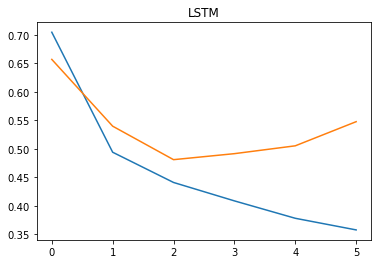

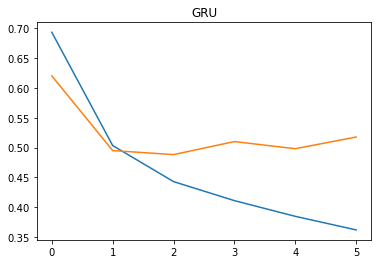

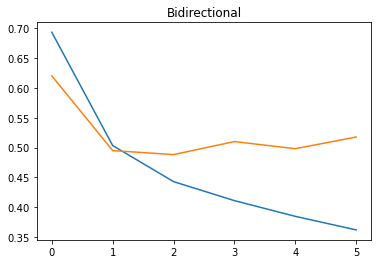

In [136]:
plt.plot(hy1.history['loss'], label = 'loss')
plt.plot(hy1.history['val_loss'], label = 'val_loss')
plt.title('LSTM')
plt.show()

plt.plot(hy2.history['loss'], label = 'loss')
plt.plot(hy2.history['val_loss'], label = 'val_loss')
plt.title('GRU')
plt.show()

plt.plot(hy2.history['loss'], label = 'loss')
plt.plot(hy2.history['val_loss'], label = 'val_loss')
plt.title('Bidirectional')
plt.show()

In [137]:
m1.evaluate(tt_x, tt_y), m2.evaluate(tt_x, tt_y), m3.evaluate(tt_x, tt_y)

929/929 [==============================] - 20s 21ms/step - loss: 0.5004 - accuracy: 0.7557


([0.4752337336540222, 0.7718961238861084],
 [0.4823401868343353, 0.7764083743095398],
 [0.5004031658172607, 0.7557328939437866])

In [138]:
t1 = '반지의 제왕 좋아해서 샀고 지인과 함께 플레이 했습니다. 싱글로는 글쎄요... 스토리는 재밌었지만 그래픽도 그닥이고 볼륨도 그닥이고 지루하기 짝이 없습니다.'
t2 = '하프라이프2 멀티가능한 시너지. 하프라이프2의 멀티 버전 시너지. 사람들과 같이하면 재미있다는 느낌도나고 에피 1 에피 2도 멀티 가능하다고 들었습니다. 한번 같이 해보는것도 좋지않나요. 추천 : 게임중이라 적기 귀찮 만점!'

In [139]:
def print_result(t):
    t.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', '')
    t = okt.morphs(t)
    t = [w for w in t if w not in st]
    t = tk.texts_to_sequences([t])
    t = pad_sequences(t, maxlen = p_l)
    score = float(m3.predict(t))
    
    if score > 0.5:
        print(f"{score * 100:.2f}% 확률로 긍정 리뷰입니다.\n")
    else:
        print(f"{(1 - score) * 100:.2f}% 확률로 부정 리뷰입니다.\n")

In [140]:
print_result(t1)
print_result(t2)

86.95% 확률로 부정 리뷰입니다.

90.31% 확률로 긍정 리뷰입니다.

